In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [17]:
california_housing = datasets.fetch_california_housing(as_frame=True)
df = california_housing.frame
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13060,3.1194,17.0,4.760684,1.076923,848.0,2.415954,38.60,-121.28,1.125
12900,2.7181,23.0,4.867500,1.022500,866.0,2.165000,38.63,-121.33,1.568
19539,2.4485,34.0,5.214724,0.996933,972.0,2.981595,37.65,-120.96,0.955
15030,3.4659,31.0,5.144289,1.016032,1198.0,2.400802,32.78,-117.02,1.630
18084,6.2182,30.0,5.982249,1.065089,1440.0,2.840237,37.32,-122.06,3.808
5074,1.8250,50.0,4.841463,1.107317,1090.0,2.658537,33.98,-118.31,1.066
20165,2.6893,26.0,5.355263,1.005639,1383.0,2.599624,34.45,-119.29,2.308
20558,4.5526,10.0,5.518519,1.005291,1073.0,2.838624,38.67,-121.80,1.544
17131,3.6712,30.0,3.659983,1.084568,2678.0,2.334786,37.46,-122.15,3.086
233,4.6563,45.0,5.986784,0.993392,1106.0,2.436123,37.79,-122.19,2.318


In [18]:
medinc_list = df['MedInc'].values.tolist()
medinc_array = df['MedInc'].values
medinc_frame = df['MedInc']

averooms_list = df['AveRooms'].values.tolist()
averooms_array = df['AveRooms'].values
averooms_frame = df['AveRooms']

In [19]:
#coveriance
def calculate_covariance(medinc_list,averooms_list):
  if len(medinc_list) != len(averooms_list):
    raise ValueError("List x1 va x2 bir biriga teng bo'lishi kerak")

  n = len(medinc_list)
  mean_medinc = sum(medinc_list)/n
  mean_averooms = sum(averooms_list)/n

  covariance = sum((medinc_list[i]-mean_medinc)*(averooms_list[i]-mean_averooms) for i in range(n))/n
  return covariance

calculate_covariance(medinc_list, averooms_list)

1.5364935631793397

In [20]:
#correlation

def calculate_correlation(X1, X2):
  if len(X1)!= len(X2):
    raise ValueError("List x1 va x2 bir biriga teng bo'lishi kerak")

  n = len(X1)
  mean_X1 = sum(X1)/n
  mean_X2 = sum(X2)/n

  #calculate covariance

  cov = sum((X1[i]-mean_X1)*(X2[i]-mean_X2) for i in range(n))/n

  #calculate  the SD of X1 and X2
  std_X1 = (sum((xi-mean_X1)**2 for xi in X1)/n)**0.5
  std_X2 = (sum((xi-mean_X2)**2 for xi in X2)/n)**0.5

  #Calculate correlation coofeitsient
  if std_X1 == 0 or std_X2 == 0:
    raise ValueError("SD cannot be zero for correlaation calculation")

  correlation = cov/(std_X1*std_X2)

  return correlation

calculate_correlation(medinc_list, averooms_list)

0.32689543164129486

In [21]:
df[['MedInc', 'AveRooms']].corr()

,MedInc,AveRooms
MedInc,1.000000,0.326895
AveRooms,0.326895,1.000000


PDF values for the sepal length data:
[0.01343988 0.01383943 0.04286798 ... 0.10932538 0.12042306 0.15489856]


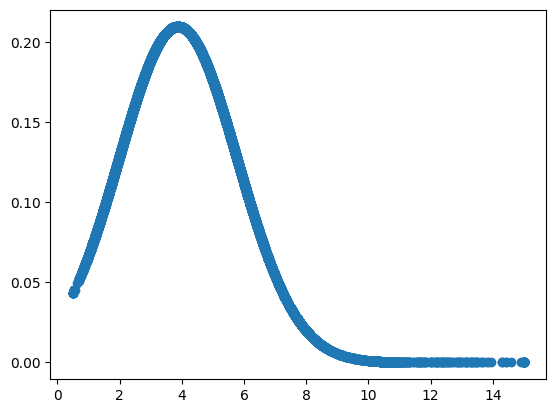

In [22]:
# Normal distribution

def calculate_pdf_vectorized(data):
  mu = np.mean(data)
  sigma = np.std(data, ddof=1)
  coeff = 1/(sigma*np.sqrt(2*np.pi))

  # Compute the exponent part for all data points in one go
  exponent = np.exp(-((data-mu)**2)/(2*sigma**2))

  return coeff*exponent

# Calculate for PDF for all data in sepal length array

pdf_values = calculate_pdf_vectorized(medinc_array)
print("PDF values for the sepal length data:")
print(pdf_values)
plt.scatter(medinc_array, pdf_values)

In [23]:
# min max scalling
def min_max(array):
  min_value = np.min(array)
  max_value = np.max(array)
  return (array-min_value)/(max_value-min_value)

min_max(medinc_array)

array([0.53966842, 0.53802706, 0.46602805, ..., 0.08276438, 0.09429525,
       0.13025338])

In [24]:
import math

PDF values for the sepal length data:
[0.00226858 0.00212335 0.00608629 ... 0.01783407 0.01950709 0.0259298 ]


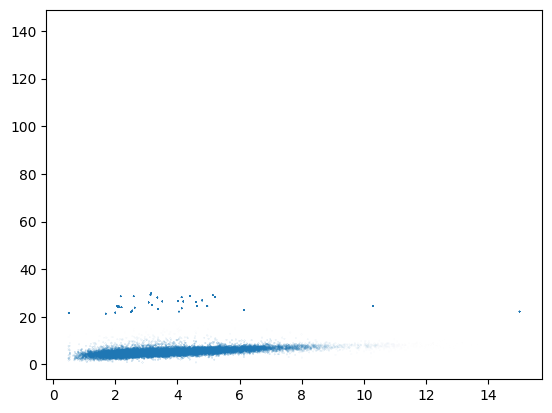

In [25]:
from math import exp
# Bivariate normal distribution

def calculate_bivariate_dist(X,Y):
  if len(X)!= len(Y):
    raise ValueError("List x va y bir biriga teng bo'lishi kerak")

  n = len(X)
  mean_X = sum(X)/n
  mean_Y = sum(Y)/n
  std_X = (sum((xi-mean_X)**2 for xi in X)/n)**0.5
  std_Y = (sum((xi-mean_Y)**2 for xi in Y)/n)**0.5
  covariance = sum((X[i] - mean_X)* (Y[i]-mean_Y) for i in range(n))/n
  correlation = covariance/(std_X*std_Y)
  coeff = 1/(2*np.pi*std_X*std_Y*(np.sqrt(1-correlation**2)))
  z_X = (np.array(X) - mean_X)/std_X
  z_Y = (np.array(Y) - mean_Y)/std_Y

  exponent = np.exp((-1/(2*(1-correlation**2)))*(z_X**2-2*correlation*z_X*z_Y+z_Y**2))

  biv_nor_dist = coeff * exponent

  return biv_nor_dist

calculate_bivariate_dist(medinc_list, averooms_list)

pdf_values = calculate_bivariate_dist(medinc_array, averooms_array)
print("PDF values for the sepal length data:")
print(pdf_values)
plt.scatter(medinc_array, averooms_array, pdf_values)






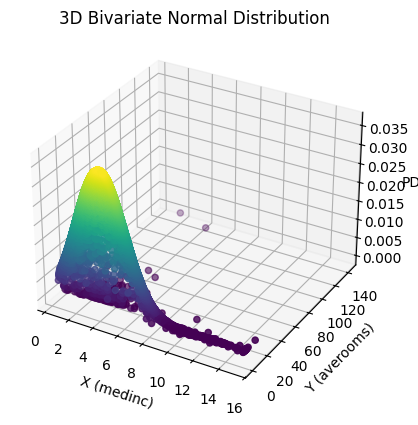

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
def plot_bivariate_3d(X, Y):
    Z = calculate_bivariate_dist(X, Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, c=Z, cmap='viridis')
    ax.set_xlabel('X (medinc)')
    ax.set_ylabel('Y (averooms)')
    ax.set_zlabel('PDF')
    plt.title('3D Bivariate Normal Distribution')
    plt.show()

plot_bivariate_3d(medinc_array, averooms_array)
